In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import import_ipynb
import nettoyage_bases

In [12]:
np.random.seed(1232)

In [13]:
def x_donnee():
    meteo_pic_conso = nettoyage_bases.meteo_pic_conso()
    ### On ajoute simplement quelque valeurs cohérente aux valeurs données pour mieux considérer le modéle lorsque la température moyenne est élevé
    x=meteo_pic_conso['temperature_moyenne'].to_numpy()
    x2=np.array([30,29,29,28,28,26,28,30,29])
    x= np.append(x,x2)
    x=x.reshape(-1,1)
    return x

def y_donnee():
    meteo_pic_conso = nettoyage_bases.meteo_pic_conso()
    y=meteo_pic_conso['pic_journalier_consommation'].to_numpy()
    y2=np.array([57000,55700,57000,54500,55475,53800,53400,55000,55200])
    y=np.append(y,y2)
    y=y.reshape(-1,1)
    return y



def liste_deg_pol():
    def Choixdeg (x,y,degree):                          ####### Cette fonction renvoie la mesure d'erreur du modéle en fonction du degrés du polynome, ceci pour obtenir la meilleure régression polynomiale possible
        polynomial_features= PolynomialFeatures(degree=degree)
        x_poly = polynomial_features.fit_transform(x)
        model = LinearRegression()
        model.fit(x_poly, y)
        y_poly_pred = model.predict(x_poly)
        rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
        r2 = r2_score(y,y_poly_pred)
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
        x_p, y_poly_pred_P = zip(*sorted_zip)
        return rmse, x_p, y_poly_pred_P,r2

    x = x_donnee()
    y = y_donnee()
    
## On détermine avec la fonction Choixdeg le meillleur degrés   
    r2_list = np.zeros(50)
    rmselist = np.zeros(50)
    x_p_list = [None]*50
    y_poly_pred_P_list=[None]*50

    for i in np.arange(1, 51):
        rmselist[i-1] ,x_p_list[i-1],y_poly_pred_P_list[i-1],r2_list[i-1]= Choixdeg (x,y,i)
    return [rmselist , x_p_list , y_poly_pred_P_list , r2_list ]


In [ ]:
def x_train_donnee():
    meteo_pic_conso = nettoyage_bases.meteo_pic_conso()
    y=meteo_pic_conso['pic_journalier_consommation'].to_numpy()
    y2=np.array([57000,55700,57000,54500,55475,53800,53400,55000,55200])
    y=np.append(y,y2)
    y=y.reshape(-1,1)
    return y

def y_train_donnee():
    


In [14]:
def choix_deg_poly():
    L_pol = liste_deg_pol()
    r2_list = L_pol[3] 
    rmselist = L_pol[0]
### On plot :
    plt.close()       
    plt.plot(np.arange(1, 51), rmselist, color='r',label='MSE')
    plt.xticks(np.arange(0, 50,2))
    plt.title('Calcul du MSE selon le degrés du polynôme')
    plt.show()

    plt.plot(np.arange(1, 51), r2_list, color='g',label='R2')
    plt.xticks(np.arange(0, 50,2))
    plt.xlabel('Degrés')
    plt.ylabel('R2')
    plt.title(' R2 en fonction du degrés du polynôme')
    return plt.show()

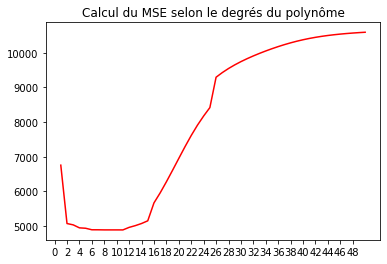

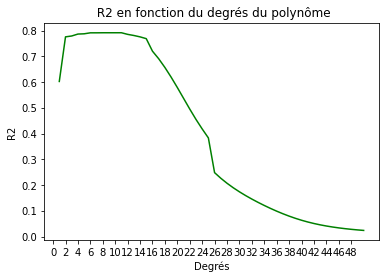

In [15]:
def plot_res_modele():
    def evalPolynonmialRegression(degree):
    #entrainement du modèle
        polynomial_features= PolynomialFeatures(degree=degree)
        X_train_poly = polynomial_features.fit_transform(X_train)
        X_test_poly = polynomial_features.fit_transform(X_test)
        model = LinearRegression()
        model.fit(X_train_poly, Y_train)
    # Evaluation du training set
 
        y_train_predict = model.predict(X_train_poly)
        rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
        r2 = r2_score(Y_train, y_train_predict)
 
 
    # Evaluation du testing set
        y_test_predict = model.predict(X_test_poly)
        rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
        r2 = r2_score(Y_test, y_test_predict)
    
        return model,r2 ,rmse

#On choisit le degrés le plus convainquant parmis ceux minimisant le rse et maximisant le R2, en loccurence 6
    poly=PolynomialFeatures(6)
    lin = LinearRegression()

    X_poly = poly.fit_transform(x)
    poly.fit(X_poly, y)
    lin.fit(X_poly, y)
    
    meteo = meteo.dropna()
    meteo = meteo.groupby(['region','day']).mean()
    meteo = meteo.reset_index(level='region')
    meteo = meteo.reset_index(level='day')
    meteo['Conso_opti_pred']= meteo['Temp_opti'].apply(prediction)
    meteo['Conso_lf_pred']= meteo['Temp_lf'].apply(prediction)
    meteo['Conso_2020_pred']= meteo['TempMoy_Deg'].apply(prediction)

In [ ]:
X_poly = poly.fit_transform(x)
poly.fit(X_poly, y)
lin.fit(X_poly, y)

#### On applique la regression a nos données

meteo = meteo.dropna()
meteo = meteo.groupby(['region','day']).mean()
meteo = meteo.reset_index(level='region')
meteo = meteo.reset_index(level='day')
meteo['Conso_opti_pred']= meteo['Temp_opti'].apply(prediction)
meteo['Conso_lf_pred']= meteo['Temp_lf'].apply(prediction)
meteo['Conso_2020_pred']= meteo['TempMoy_Deg'].apply(prediction)

##### On peut plot n'importe quelle région, et analyser les conséquence en générale.
plot_reg('Hauts-de-France')